In [2]:
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [3]:
# Generate dummy dataset
X,y=make_blobs(n_samples=1000,centers=2,n_features=2,random_state=78)

#Creating a DataFrame with the dummy data
df=pd.DataFrame(X, columns=["Feature 1","Feature 2"])
df["Target"] = y
df

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1
...,...,...,...
995,6.208962,5.233968,1
996,-9.795754,3.502709,0
997,4.335167,5.928298,1
998,-8.466632,3.577022,0


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

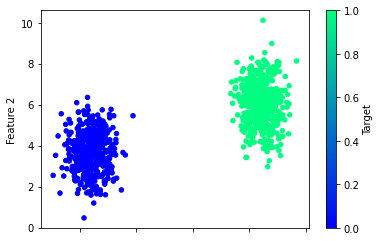

In [4]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [5]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=78)

In [6]:
# create scaler instance
X_scaler=skl.preprocessing.StandardScaler()

#fit the scaler
X_scaler.fit(X_train)

#scale the data
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

In [7]:
#create sequential model
nn_model=tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1,activation="relu",input_dim=2))

In [9]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [10]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# Fit the model to the training data
fit_model=nn_model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 819us/step - loss: 0.5777 - accuracy: 0.8853
Epoch 2/100
24/24 [==============================] - 0s 740us/step - loss: 0.5634 - accuracy: 0.8920
Epoch 3/100
24/24 [==============================] - 0s 775us/step - loss: 0.5491 - accuracy: 0.8987
Epoch 4/100
24/24 [==============================] - 0s 793us/step - loss: 0.5349 - accuracy: 0.9093
Epoch 5/100
24/24 [==============================] - 0s 867us/step - loss: 0.5205 - accuracy: 0.9213
Epoch 6/100
24/24 [==============================] - 0s 829us/step - loss: 0.5067 - accuracy: 0.9253
Epoch 7/100
24/24 [==============================] - 0s 810us/step - loss: 0.4930 - accuracy: 0.9320
Epoch 8/100
24/24 [==============================] - 0s 829us/step - loss: 0.4798 - accuracy: 0.9373
Epoch 9/100
24/24 [==============================] - 0s 815us/step - loss: 0.4668 - accuracy: 0.9413
Epoch 10/100
24/24 [==============================] - 0s 692us/step - loss: 0.4542 - accura

24/24 [==============================] - 0s 895us/step - loss: 0.0973 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 881us/step - loss: 0.0957 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 761us/step - loss: 0.0941 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 744us/step - loss: 0.0926 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 730us/step - loss: 0.0911 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 693us/step - loss: 0.0896 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 830us/step - loss: 0.0882 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 927us/step - loss: 0.0868 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 886us/step - loss: 0.0854 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 860us/step - loss: 0.0841 - accuracy: 

<AxesSubplot:>

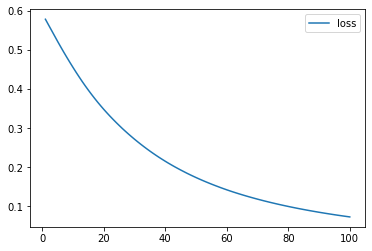

In [15]:
# Create a DataFrame containing training history
history_df=pd.DataFrame(fit_model.history,index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

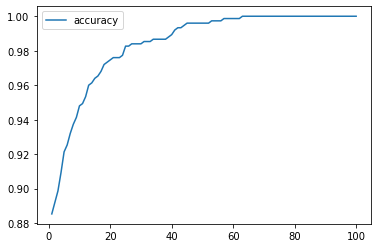

In [16]:
# Plot the accuracy
history_df.plot(y="accuracy")


In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0673 - accuracy: 1.0000
Loss: 0.06729064136743546, Accuracy: 1.0


In [18]:
# Predict the classification of a new set of blob data
new_X,new_y=make_blobs(n_samples=10,centers=2,n_features=2,random_state=78)
new_X_scaled=X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

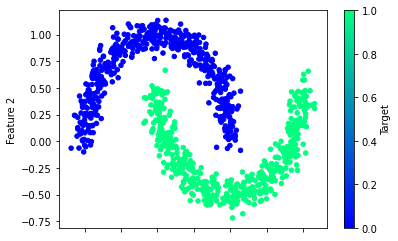

In [21]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [22]:
# Create training and testing sets
X_moon_train,X_moon_test,y_moon_train,y_moon_test=train_test_split(X_moons,y_moons,random_state=78)

# Create the scaler instance
X_moon_scaler=skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [23]:
# Training the model with the nonlinear data
model_moon=nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 901us/step - loss: 1.0764 - accuracy: 0.4773
Epoch 2/100
24/24 [==============================] - 0s 861us/step - loss: 0.9103 - accuracy: 0.5133
Epoch 3/100
24/24 [==============================] - 0s 741us/step - loss: 0.8058 - accuracy: 0.5387
Epoch 4/100
24/24 [==============================] - 0s 752us/step - loss: 0.7385 - accuracy: 0.5693
Epoch 5/100
24/24 [==============================] - 0s 856us/step - loss: 0.6879 - accuracy: 0.5920
Epoch 6/100
24/24 [==============================] - 0s 861us/step - loss: 0.6468 - accuracy: 0.6133
Epoch 7/100
24/24 [==============================] - 0s 809us/step - loss: 0.6126 - accuracy: 0.6240
Epoch 8/100
24/24 [==============================] - 0s 782us/step - loss: 0.5826 - accuracy: 0.6413
Epoch 9/100
24/24 [==============================] - 0s 923us/step - loss: 0.5567 - accuracy: 0.6653
Epoch 10/100
24/24 [==============================] - 0s 898us/step - loss: 0.5340 - accura

24/24 [==============================] - 0s 849us/step - loss: 0.2632 - accuracy: 0.8920
Epoch 82/100
24/24 [==============================] - 0s 782us/step - loss: 0.2629 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 826us/step - loss: 0.2626 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 913us/step - loss: 0.2622 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 846us/step - loss: 0.2619 - accuracy: 0.8907
Epoch 86/100
24/24 [==============================] - 0s 826us/step - loss: 0.2616 - accuracy: 0.8907
Epoch 87/100
24/24 [==============================] - 0s 870us/step - loss: 0.2613 - accuracy: 0.8907
Epoch 88/100
24/24 [==============================] - 0s 926us/step - loss: 0.2610 - accuracy: 0.8907
Epoch 89/100
24/24 [==============================] - 0s 826us/step - loss: 0.2607 - accuracy: 0.8907
Epoch 90/100
24/24 [==============================] - 0s 826us/step - loss: 0.2604 - accuracy: 

<AxesSubplot:>

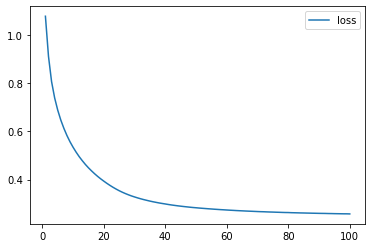

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

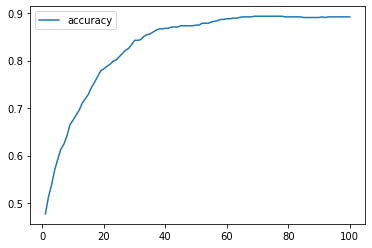

In [25]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [27]:
# Generate our new Sequential model
new_model=tf.keras.models.Sequential()

In [29]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [30]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 766us/step - loss: 0.7111 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 606us/step - loss: 0.6931 - accuracy: 0.5307
Epoch 3/100
24/24 [==============================] - 0s 642us/step - loss: 0.6796 - accuracy: 0.5307
Epoch 4/100
24/24 [==============================] - 0s 609us/step - loss: 0.6678 - accuracy: 0.5307
Epoch 5/100
24/24 [==============================] - 0s 632us/step - loss: 0.6566 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 0s 681us/step - loss: 0.6450 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 670us/step - loss: 0.6317 - accuracy: 0.5307
Epoch 8/100
24/24 [==============================] - 0s 653us/step - loss: 0.6170 - accuracy: 0.5400
Epoch 9/100
24/24 [==============================] - 0s 654us/step - loss: 0.6004 - accuracy: 0.6920
Epoch 10/100
24/24 [==============================] - 0s 637us/step - loss: 0.5832 - accura

24/24 [==============================] - 0s 625us/step - loss: 0.2573 - accuracy: 0.9040
Epoch 82/100
24/24 [==============================] - 0s 652us/step - loss: 0.2563 - accuracy: 0.9040
Epoch 83/100
24/24 [==============================] - 0s 608us/step - loss: 0.2554 - accuracy: 0.9053
Epoch 84/100
24/24 [==============================] - 0s 609us/step - loss: 0.2545 - accuracy: 0.9053
Epoch 85/100
24/24 [==============================] - 0s 609us/step - loss: 0.2536 - accuracy: 0.9067
Epoch 86/100
24/24 [==============================] - 0s 652us/step - loss: 0.2528 - accuracy: 0.9067
Epoch 87/100
24/24 [==============================] - 0s 609us/step - loss: 0.2526 - accuracy: 0.9040
Epoch 88/100
24/24 [==============================] - 0s 652us/step - loss: 0.2517 - accuracy: 0.9053
Epoch 89/100
24/24 [==============================] - 0s 652us/step - loss: 0.2507 - accuracy: 0.9067
Epoch 90/100
24/24 [==============================] - 0s 695us/step - loss: 0.2499 - accuracy: 

In [ ]:
# Generate our new Sequential model
